In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/var/folders/m1/0pv5jqcs6h34_x160t92550h0000gn/T/ipykernel_61966/3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Pre-lab

In [2]:
# 250ml 60*10e-6g/ml Phosphorous (P)
concentration = 60*10**-6 # g/ml
volume = 250 # ml
mass_p = concentration * volume # g
mass_p_mg = mass_p * 10**3 # mg
print(f"mass of P in 250ml of 60*10e-6g/ml solution: {mass_p_mg} mg")

mass of P in 250ml of 60*10e-6g/ml solution: 15.0 mg


In [3]:
Molar_mass_P = 30.97 # g/mol
amount_P = mass_p / Molar_mass_P # mol
mass_kh2po4 = 136.09 # g/mol
amount_kh2po4 = amount_P * mass_kh2po4 # g
print(f"amount of kh2po4 in 250ml of 60*10e-6g/ml solution: {amount_kh2po4} g")

amount of kh2po4 in 250ml of 60*10e-6g/ml solution: 0.06591378753632547 g


## Lab

In [5]:
mengde_kh2po4_veid = 0.0734 # g

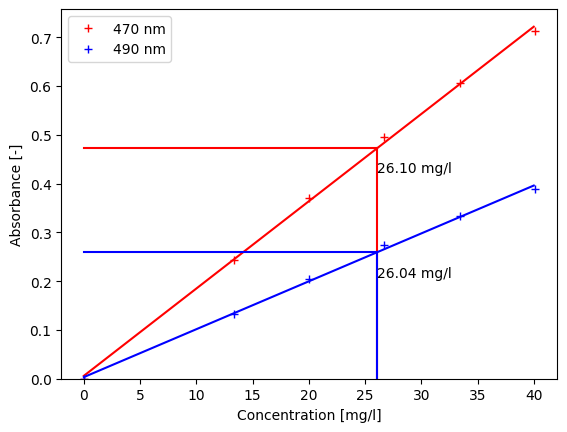

In [10]:

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
################################### Experimental data
mP= mengde_kh2po4_veid * 30.9737619/136.086 # gram KH2PO4 *molvekt P/molvekt KH2PO4
konsentrasjonIStandarlosning=mP/250 *10**6 # ug/ml
Vstart=[0, 6.85, 0.1, 4.87, (2.33+7.96), (22.32+7.31)] # ml
Vstopp=[0, 26.85, 30.10, 44.86, (22.32+37.97), (42.31+47.31)] # ml
Abs470=[0, 0.244, 0.370, 0.495, 0.606, 0.712] # -
Abs490=[0, 0.132, 0.204, 0.274, 0.333, 0.389] # -
AbsUkjent470=0.473
AbsUkjent490=0.259
################################### Calculate
konsentrasjon=[]
for i in range(len(Vstart)):
    konsentrasjon.append((Vstopp[i]-Vstart[i])*konsentrasjonIStandarlosning/100)
# ug/ml
a470,b470 = np.polyfit(konsentrasjon, Abs470, 1) # y=ax+b
Kukjent470=(AbsUkjent470-b470)/a470
a490,b490 = np.polyfit(konsentrasjon, Abs490, 1)
Kukjent490=(AbsUkjent490-b490)/a490
################################### Plot 470
plt.plot(konsentrasjon,Abs470,color='red',marker='+',linestyle='None',
label='470 nm') # plot exper. data
plt.plot([0,40],[b470,a470*40+b470],color='red') #plot linear regression
plt.plot([Kukjent470,Kukjent470],[0,AbsUkjent470],color='red') # guiding line
plt.plot([0,Kukjent470],[AbsUkjent470,AbsUkjent470],color='red') # guiding line
plt.text(Kukjent470,AbsUkjent470-0.05,
"%.2f mg/l" %Kukjent470) # result as text in plot
################################### Plot 490
plt.plot(konsentrasjon,Abs490,color='blue',marker='+',linestyle='None',
label='490 nm')
plt.plot([Kukjent490,Kukjent490],[0,AbsUkjent490],color='blue')
plt.plot([0,Kukjent490],[AbsUkjent490,AbsUkjent490],color='blue')
plt.plot([0,40],[b490,a490*40+b490],color='blue')
plt.text(Kukjent490,AbsUkjent490-0.05,
"%.2f mg/l" %Kukjent490)
################################### Finalize and save plot
plt.legend(loc=2)
plt.ylabel('Absorbance [-]')
plt.xlabel('Concentration [mg/l]')
ax.set_ylim([0,ax.get_ylim()[1]]) # fix bottom of y-axis to 0
plt.savefig('plot.pdf')

Konsentrasjoner:

##### For ug/ml i 100ml kolbe:

470nm: 26.10

490nm: 26.04

##### For ug/ml i 250ml kolbe:

470nm: 52.20

490nm: 52.08

In [11]:
# To get the 100ml we needed to take 50ml of the 250ml solution and dilute it with 30ml water and 20ml molybdate-vanadate reagent
# Thus we get the following concentrations
# c1 = 2*c2 due to there only being 50ml of the original solution in the 100ml volume
# Here c2 is the concentration in the 100ml solution
# Thus for the 250ml solution we have c1 = 2*c2
concentration_250ml_470 = Kukjent470*2 # mg/l
concentration_250ml_490 = Kukjent490*2 # mg/l
print(f"Concentration in 250ml solution 470nm: {concentration_250ml_470} mg/l")
print(f"Concentration in 250ml solution 490nm: {concentration_250ml_490} mg/l")

Concentration in 250ml solution 470nm: 52.20069255294594 mg/l
Concentration in 250ml solution 490nm: 52.08072581378709 mg/l


In [12]:
# Total amount is then concentration * volume
amount_250ml_470 = concentration_250ml_470 * 250 # mg
amount_250ml_490 = concentration_250ml_490 * 250 # mg
print(f"Amount in 250ml solution 470nm: {amount_250ml_470} mg")
print(f"Amount in 250ml solution 490nm: {amount_250ml_490} mg")

Amount in 250ml solution 470nm: 13050.173138236485 mg
Amount in 250ml solution 490nm: 13020.181453446772 mg
